# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Load the Data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
# Download the file and load it into dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
file = requests.get(url)
with open("Online Retail.xlsx", "wb") as f:
    f.write(file.content)

In [3]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data cleaning

In [4]:
# Check for duplicates
duplicated = df.duplicated()
print("There are", duplicated.sum(), "duplicates")

There are 5268 duplicates


In [5]:
# Remove the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [6]:
# Check for missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [7]:
# Upon review, the rows with missing CustomerIDs represent valid sales transactions, we will keep them.
df[df.CustomerID.isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [8]:
# The missing CustomerIDs likely represent transactions that were made without an identifiable account, such as manual order, adjustments, or anonymous transactions.
# We will assign 'Unknown' to these CustomerIDs.
df.CustomerID = df.CustomerID.fillna(0)
df.CustomerID = df.CustomerID.astype('int') # Convert to integer to remove the decimal points from CustomerID values
df.CustomerID = df.CustomerID.replace({0: 'Unknown'})
print(df.isnull().sum())
df.head()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
# Those rows with 'Description' as NaN all have 'UnitPrice' as 0
print(df[df.Description.isnull()].UnitPrice.value_counts())
print()
print(f"Percentage of missing values in Description: {round(df.Description.isnull().sum()*100/len(df),2)}%")

UnitPrice
0.0    1454
Name: count, dtype: int64

Percentage of missing values in Description: 0.27%


In [10]:
# Given that the rows with NaN values in the 'Description' column are negligible and have a unit price of 0, it is likely that they don't represent purchases (perhaps they are gifts for the orders).
# As a result, I will drop these rows.
df.dropna(subset=['Description'], inplace=True)
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.7+ MB


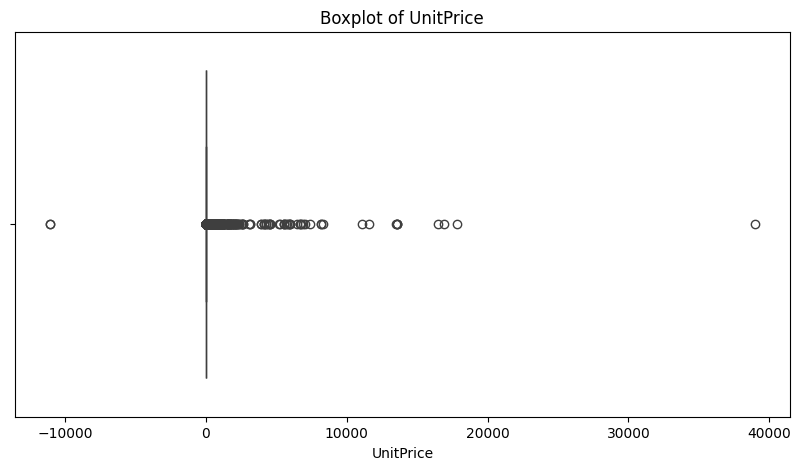

Amount of rows with zero unit price: 1056
Amount of rows with negative unit price: 2


In [12]:
# Use boxplot to visualize the distribution of UnitPrice
plt.figure(figsize=(10,5))
sns.boxplot(x=df.UnitPrice)
plt.title('Boxplot of UnitPrice')
plt.show()
print(f"Amount of rows with zero unit price: {len(df[df.UnitPrice == 0])}")
print(f"Amount of rows with negative unit price: {len(df[df.UnitPrice < 0])}")

In [13]:
# Investigate the rows with negative Unit Prices
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,Unknown,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,Unknown,United Kingdom


**🔍 Observations**

*   Zero unit prices may represent promotional items, samples, or potential data entry errors.
*   Negative unit prices, upon investigations, are due to bad debt adjustment.

These entries are not relevant to the analysis and may distort results. Since they represent a small portion of the dataset, they will be excluded from further analysis.

In [14]:
# Remove the rows with 0 and negative unit prices
df.drop(df[df.UnitPrice <= 0].index, inplace=True)

In [15]:
df.describe()
# It's noted that there are negative amount in both Quantity column, they may represent returns.

,Quantity,InvoiceDate,UnitPrice
count,534129.000000,534129,534129.000000
mean,9.916818,2011-07-04 12:02:01.631403776,4.695864
min,-80995.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 11:36:00,1.250000
50%,3.000000,2011-07-19 15:55:00,2.100000
75%,10.000000,2011-10-18 17:10:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,216.452113,NaN,95.079189


In [16]:
# This is an example of a purchase and its corresponding return or cancellation.
# We can see that the return has the same InvoiceNo as the original order, but with a 'C' prefix indicating it is a reversal.
df[ (df.Quantity == 80995) | (df.Quantity == -80995) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [17]:
df.StockCode.str.len().value_counts().sort_index(ascending=False)

,count
StockCode,
12.0,68
9.0,47
8.0,20
7.0,388
6.0,50514
4.0,1271
3.0,707
2.0,143
1.0,701


In [18]:
# Usual product codes are typically 6 characters or longer
print(df[df.StockCode.str.len() == 12])
print(df[df.StockCode.str.len() == 12].Description.unique())
df[df.StockCode.str.len() == 12].StockCode.unique()

       InvoiceNo     StockCode                         Description  Quantity  \
4406      536779  BANK CHARGES                        Bank Charges         1   
14435    C537572  BANK CHARGES                        Bank Charges        -1   
28992    C538680  BANK CHARGES                        Bank Charges        -1   
38248     539492  gift_0001_40  Dotcomgiftshop Gift Voucher £40.00         1   
42057     539958  gift_0001_50  Dotcomgiftshop Gift Voucher £50.00         1   
...          ...           ...                                 ...       ...   
481152   C577342  BANK CHARGES                        Bank Charges        -1   
481153   C577343  BANK CHARGES                        Bank Charges        -1   
506357    579137  BANK CHARGES                        Bank Charges         1   
534008    581127  BANK CHARGES                        Bank Charges         1   
536047    581217  gift_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   

               InvoiceDate  UnitPrice C

array(['BANK CHARGES', 'gift_0001_40', 'gift_0001_50', 'gift_0001_30',
       'gift_0001_20', 'gift_0001_10'], dtype=object)

**🔍 Observations**

The following `StockCode` values represent non-product transactions (e.g., fees, adjustments, or services) and are not relevant to product sales analysis. These rows will be excluded:
* `BANK CHARGES` -> Bank Charges
* `AMAZONFEE` -> Amazon Fee
* `POST` -> Postage
* `DOT` -> Dotcom Postage
* `CRUK` -> Cancer Research UK Commission
* `C2` -> Carriage
* `B` -> Adjust bad debt


In [19]:
exclude_stockCode = ['BANK CHARGES', 'AMAZONFEE', 'POST', 'DOT', 'CRUK', 'C2', 'B']
df = df[~df.StockCode.isin(exclude_stockCode)]

## Explore the dataset and Visualization

In [20]:
# The boxplots and the descriptive statistics suggest that there are many outliers in both the Quantity and UnitPrice columns
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,531939.000000,531939,531939.000000
mean,9.950521,2011-07-04 12:59:32.594564352,3.708912
min,-80995.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 11:49:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 09:48:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,216.896549,NaN,59.561820


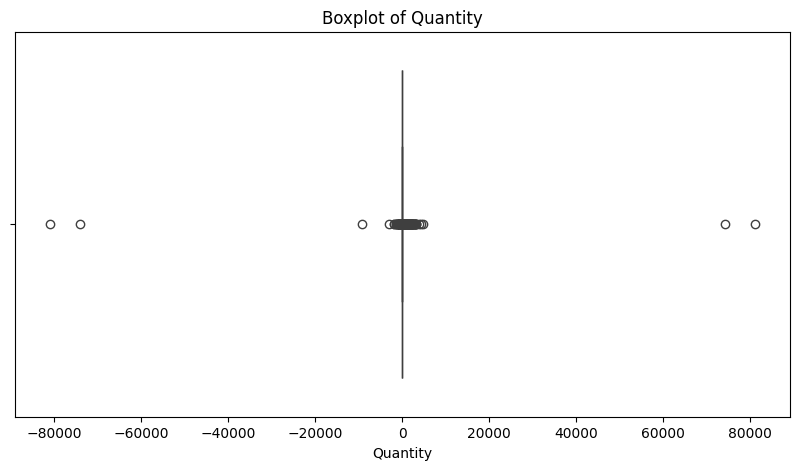

In [21]:
# Use boxplot to visualize the distribution of Quantity
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Quantity)
plt.title('Boxplot of Quantity')
plt.show()

In [22]:
# Calculate outliers for Quantity using the Interquantile method
print("--- Quantity ---")
iqr_quantity = df.Quantity.quantile(0.75) - df.Quantity.quantile(0.25)
upper_q = round(df.Quantity.quantile(0.75) + 1.5 * iqr_quantity, 2)
lower_q = round(df.Quantity.quantile(0.25) - 1.5 * iqr_quantity, 2)
print(f"Outlier bounds for Quantity: {lower_q} to {upper_q}")

quantity_inbounds = (df.Quantity < upper_q) & (df.Quantity > lower_q)
print(f"In that case, {df[~quantity_inbounds].shape[0]} rows ({round(len(df[~quantity_inbounds]) * 100 / len(df), 2)}%) are considered outliers.", end="\n\n")

# Calculate outliers for UnitPrice using the Interquantile method
print("--- UnitPrice ---")
iqr_price = df.UnitPrice.quantile(0.75) - df.UnitPrice.quantile(0.25)
upper_p = round(df.UnitPrice.quantile(0.75) + 1.5 * iqr_price, 2)
lower_p = round(df.UnitPrice.quantile(0.25) - 1.5 * iqr_price, 2)
print(f"Outlier bounds for UnitPrice: {lower_p} to {upper_p}")

price_inbounds = (df.UnitPrice < upper_p) & (df.UnitPrice > lower_p)
print(f"In that case, {df[~price_inbounds].shape[0]} rows ({round(len(df[~price_inbounds]) * 100 / len(df), 2)}%) are considered outliers.")

--- Quantity ---
Outlier bounds for Quantity: -12.5 to 23.5
In that case, 57326 rows (10.78%) are considered outliers.

--- UnitPrice ---
Outlier bounds for UnitPrice: -3.07 to 8.45
In that case, 37356 rows (7.02%) are considered outliers.


**Justification**

Although these entries are classified as outliers based on the IQR method, they likely represent valid business activities. Removing them could result in the loss of valuable and legitimate data, so they will be retained for analysis.

In [23]:
# Extracting date and time components from the InvoiceDate column to enable time-based analysis
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month
df['Day'] = df.InvoiceDate.dt.day
df['Weekday'] = df.InvoiceDate.dt.weekday
df['Time'] = df.InvoiceDate.dt.time
# Calculate sales for each row
df['Sales'] = df['Quantity'] * df['UnitPrice']
total_sales = df.Sales.sum()
print(f"Total sales: £{total_sales:,.2f}")
df.head()

Total sales: £9,694,236.46


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34


In [24]:
# Drop columns irrelevant to analysis
# - InvoiceDate: Individual date components are extracted.
# - StockCode: Description is sufficient for analysis.
df.drop(['InvoiceDate', 'StockCode'], axis=1, inplace=True)
df.head()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Time,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010,12,1,2,08:26:00,15.30
1,536365,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010,12,1,2,08:26:00,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34


## Questions to Explore❓

- What are the most popular products based on sales volume?
- What are the most profitable products based on total sales?
- Which months had the highest total sales?
- Is there a specific time of day or day of the week when orders are most frequently made?
- Which customer made the most purchases overall?
- Which customer cancelled the most orders?

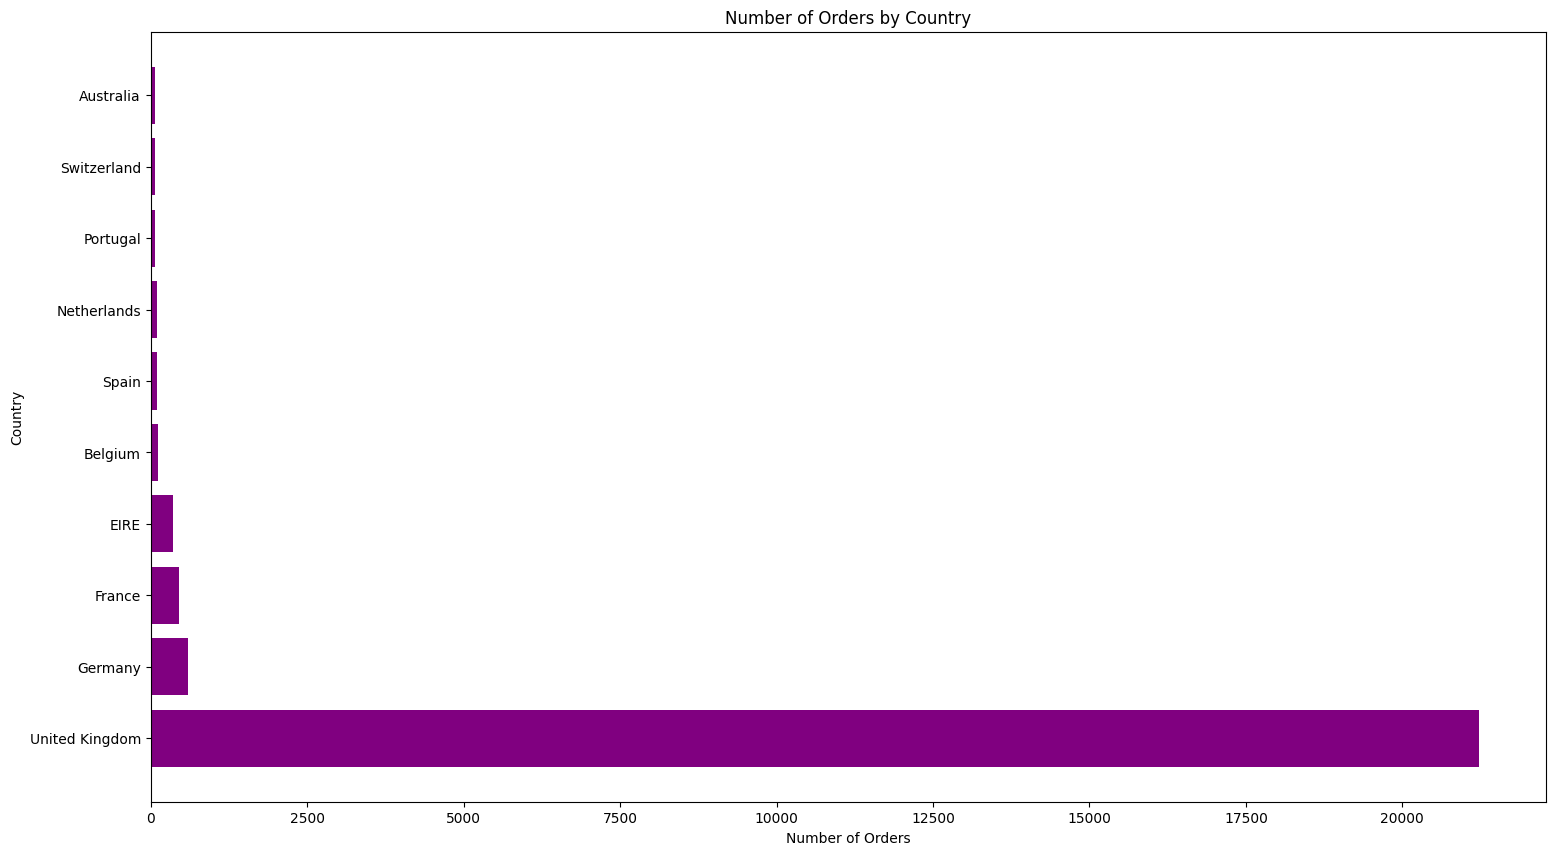

In [25]:
# Visualize the number of orders by country
order_by_country = df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(18,10))
plt.barh(order_by_country.index, order_by_country.values, color="purple")
plt.title('Number of Orders by Country')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.xticks(rotation=0)
plt.show()

UK has the most orders and the most sales, Germany has the 2nd most order, but the 2nd most sales come from Netherlands

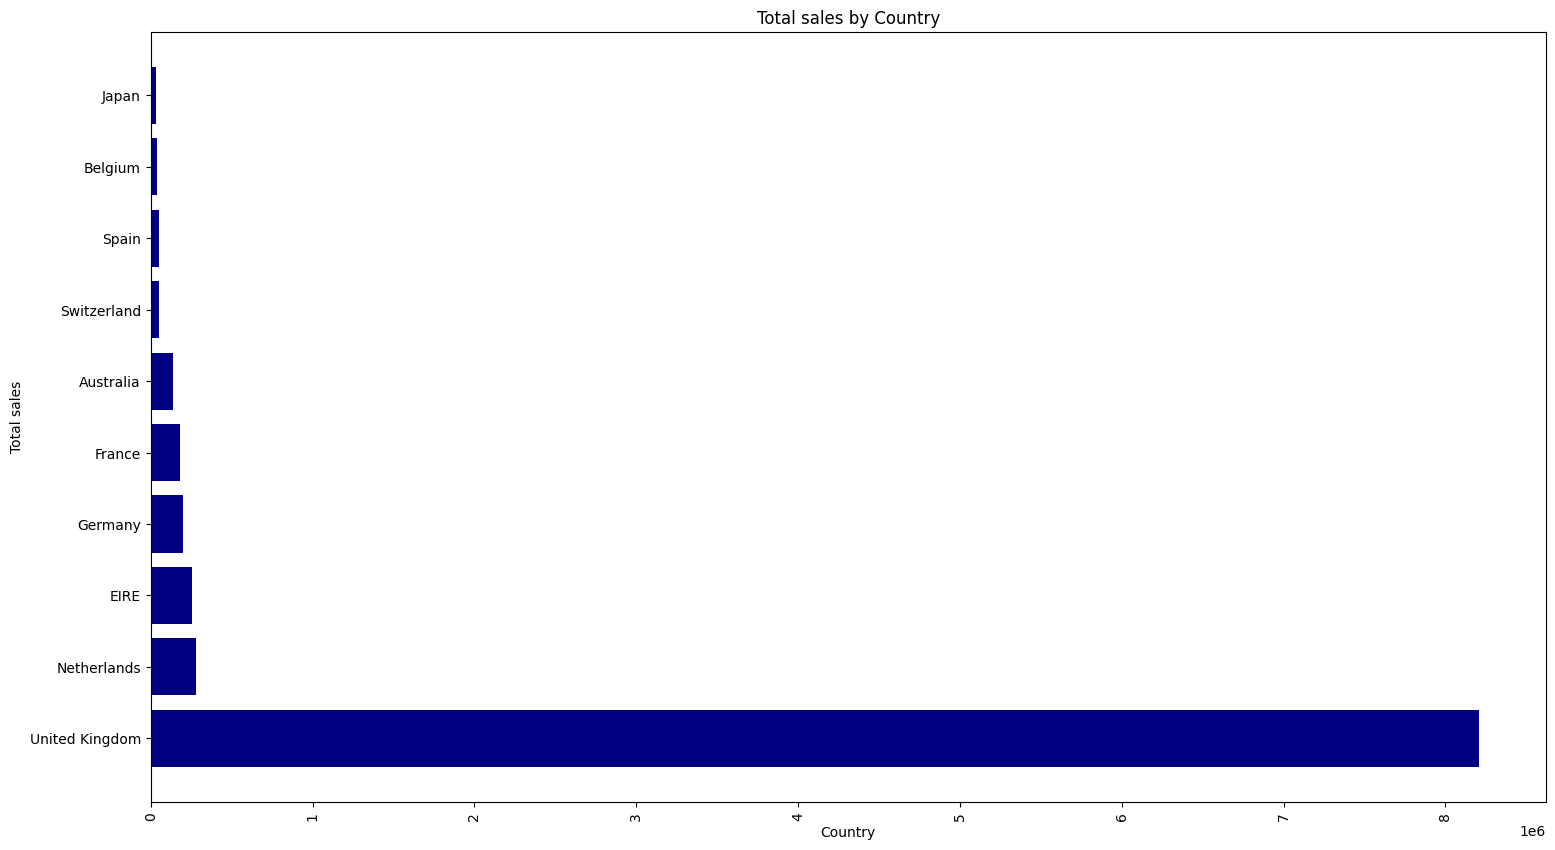

In [26]:
# Visualize Total Sales by country
sales_by_country = df.groupby(['Country'])['Sales'].sum().sort_values(ascending=False).head(10) # Returns with negative values are cancelled out

plt.figure(figsize=(18,10))
plt.barh(sales_by_country.index, sales_by_country.values, color="navy")
plt.title('Total sales by Country')
plt.xlabel('Country')
plt.ylabel('Total sales')
plt.xticks(rotation=90)
plt.show()

**🔍 Observations**

The United Kingdom has the highest number of orders and total sales, which is expected as it is an UK-based online retailer. Germany ranks second in the number of orders, while the Netherlands ranks second in total sales.

                                    Quantity     Sales  AvgPrice
Description                                                     
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53751  13560.09  0.252276
JUMBO BAG RED RETROSPOT                47256  92175.79  1.950563
POPCORN HOLDER                         36322  33959.26  0.934950
ASSORTED COLOUR BIRD ORNAMENT          36282  58792.42  1.620429
PACK OF 72 RETROSPOT CAKE CASES        36016  21047.07  0.584381
WHITE HANGING HEART T-LIGHT HOLDER     35294  99612.42  2.822361
RABBIT NIGHT LIGHT                     30631  66661.63  2.176280
MINI PAINT SET VINTAGE                 26437  16810.42  0.635867
PACK OF 12 LONDON TISSUES              26095   7967.82  0.305339
PACK OF 60 PINK PAISLEY CAKE CASES     24719  12170.77  0.492365


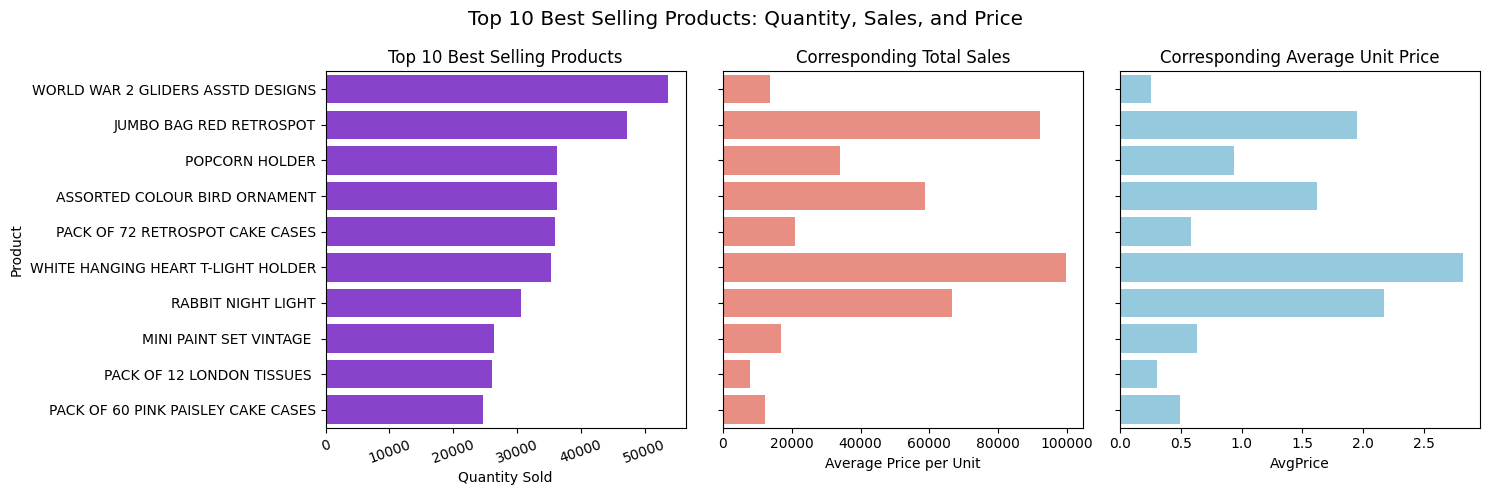

In [27]:
# Identify the most sold items by quantity
quantity_by_prod = df.groupby('Description')[['Quantity','Sales']].sum().sort_values(by="Quantity",ascending=False)
quantity_by_prod['AvgPrice'] = quantity_by_prod['Sales'] / quantity_by_prod['Quantity']
print(quantity_by_prod.head(10))

# Top 10 Best Selling Products with Quantity and Average Price
fig= plt.figure(figsize=(15,5))
# Plot 1: Quantity Sold
ax0 = fig.add_subplot(1,3,1)
sns.barplot(x=quantity_by_prod.head(10).Quantity, y=quantity_by_prod.head(10).index, color="blueviolet" )
ax0.set_title('Top 10 Best Selling Products')
ax0.set_xlabel('Quantity Sold')
ax0.set_ylabel('Product')
plt.xticks(rotation=20)

# Plot 2: Average Price
ax1 = fig.add_subplot(1,3,2)
sns.barplot(x=quantity_by_prod.head(10).Sales, y=quantity_by_prod.head(10).index, color="salmon" )
ax1.set_title('Corresponding Total Sales')
ax1.set_xlabel('Average Price per Unit')
ax1.set_ylabel('')
ax1.set_yticklabels([])

# Plot 3: Total Sales
ax2 = fig.add_subplot(1,3,3)
sns.barplot(x=quantity_by_prod.head(10).AvgPrice, y=quantity_by_prod.head(10).index, color="skyblue" )
ax2.set_title('Corresponding Average Unit Price')
ax2.set_ylabel('')
ax2.set_yticklabels([])

plt.suptitle('Top 10 Best Selling Products: Quantity, Sales, and Price', fontsize="x-large")
plt.tight_layout()
plt.show()
# 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' is the best-selling product which has the lowest unit price among the top 10.
# The best-selling products generally have lower unit prices (below $3), suggesting that their popularity may be driven by affordability.
# Products like "WORLD WAR 2 GLIDERS ASSTD DESIGNS" could be inventory priorities due to high demand.

                                        Sales  Quantity   AvgPrice  \
Description                                                          
REGENCY CAKESTAND 3 TIER            164459.49     12996  12.654624   
WHITE HANGING HEART T-LIGHT HOLDER   99612.42     35294   2.822361   
PARTY BUNTING                        98243.88     18006   5.456175   
JUMBO BAG RED RETROSPOT              92175.79     47256   1.950563   
RABBIT NIGHT LIGHT                   66661.63     30631   2.176280   
PAPER CHAIN KIT 50'S CHRISTMAS       63715.24     18876   3.375463   
ASSORTED COLOUR BIRD ORNAMENT        58792.42     36282   1.620429   
CHILLI LIGHTS                        53746.66     10222   5.257940   
SPOTTY BUNTING                       42030.67      8210   5.119448   
JUMBO BAG PINK POLKADOT              41584.43     20992   1.980966   

                                    SalesContribution  
Description                                            
REGENCY CAKESTAND 3 TIER                       

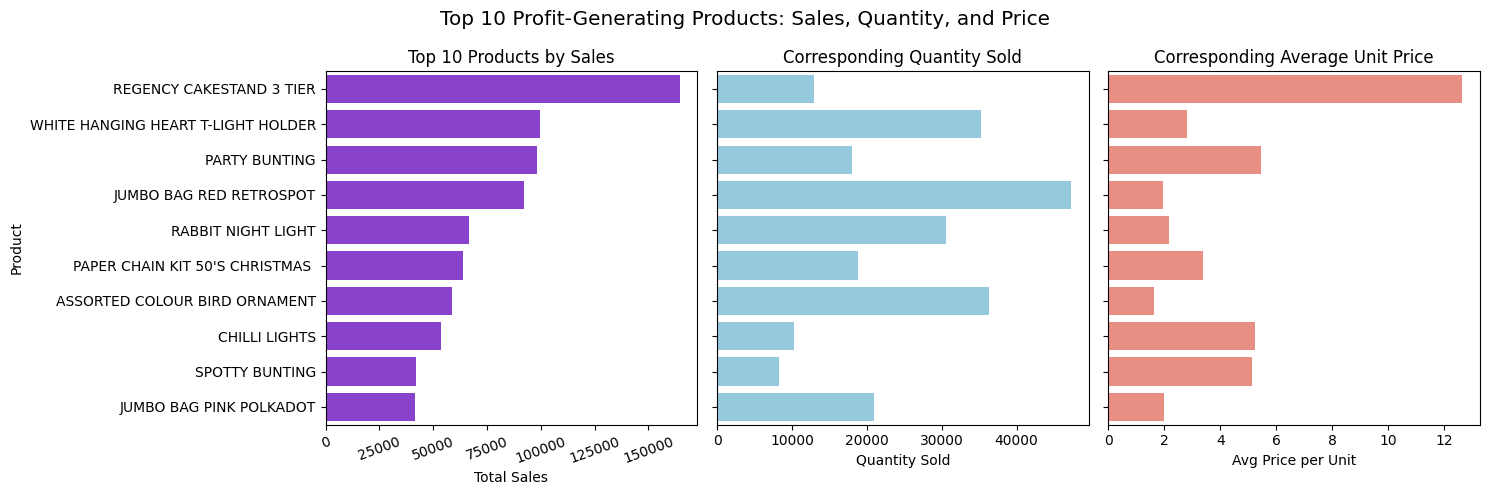

In [28]:
# Identify the product that generate the most revenue
sales_by_product = df.groupby('Description')[['Sales','Quantity']].sum().sort_values(by="Sales",ascending=False)
sales_by_product['AvgPrice'] = sales_by_product['Sales'] / sales_by_product['Quantity']
sales_by_product['SalesContribution'] = round(sales_by_product['Sales'] / total_sales * 100, 2)
print(sales_by_product.head(10))

# Top 10 most profitable products with Quantity and Average Price
fig= plt.figure(figsize=(15,5))
# Plot 1: Total Sales
ax0 = fig.add_subplot(1, 3, 1)
sns.barplot(x=sales_by_product.head(10)['Sales'], y=sales_by_product.head(10).index, color="blueviolet")
ax0.set_title('Top 10 Products by Sales')
ax0.set_xlabel('Total Sales')
ax0.set_ylabel('Product')
plt.xticks(rotation=20)

# Plot 2: Quantity Sold
ax1 = fig.add_subplot(1, 3, 2)
sns.barplot(x=sales_by_product.head(10)['Quantity'], y=sales_by_product.head(10).index, color="skyblue")
ax1.set_title('Corresponding Quantity Sold')
ax1.set_xlabel('Quantity Sold')
ax1.set_ylabel('')
ax1.set_yticklabels([])

# Plot 3: Average Price
ax2 = fig.add_subplot(1, 3, 3)
sns.barplot(x=sales_by_product.head(10)['AvgPrice'], y=sales_by_product.head(10).index, color="salmon")
ax2.set_title('Corresponding Average Unit Price')
ax2.set_xlabel('Avg Price per Unit')
ax2.set_ylabel('')
ax2.set_yticklabels([])

# Super Title
plt.suptitle('Top 10 Profit-Generating Products: Sales, Quantity, and Price', fontsize="x-large")
plt.tight_layout()
plt.show()
# 'REGENCY CAKESTAND 3 TIER' is the most profitable product, generating significantly higher sales than the others, and it also has a notably higher unit price among the top 10.
# Apart from 'REGENCY CAKESTAND 3 TIER', the remaining profitable products have a unit price below $6, with 'JUMBO BAG RED RETROSPOT' selling in large quantities.
# The business might consider focusing on products like 'REGENCY CAKESTAND 3 TIER' to maximize revenue.

In [29]:
df.head()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Time,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010,12,1,2,08:26:00,15.30
1,536365,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010,12,1,2,08:26:00,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010,12,1,2,08:26:00,20.34


Weekday
0    3109
1    3528
2    3676
3    4226
4    3124
6    2204
Name: InvoiceNo, dtype: int64


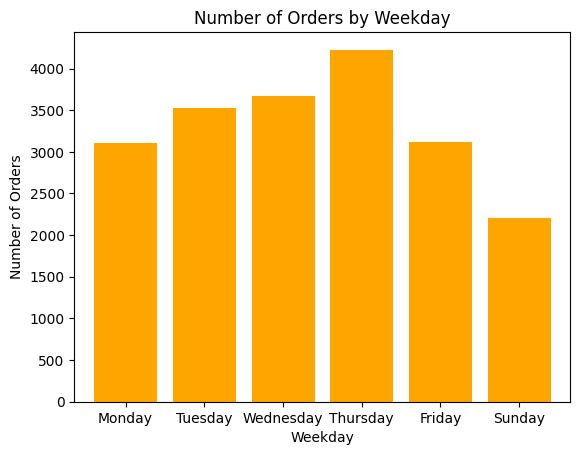

In [30]:
# Visualize the number of orders placed by weekday
order_by_weekday = df[df.Sales>0].groupby('Weekday')['InvoiceNo'].nunique().sort_index()
print(order_by_weekday)
# There were no orders on weekday 5 (i.e. Saturday), which may be a day off for the company.

# Monday = 0 ... Sunday = 6
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
order_by_weekday.index = weekdays

order_by_weekday.plot(kind='bar', color='orange', width=0.8)
plt.title('Number of Orders by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()
# We see the highest number of orders on Thursday and the lowest on Sunday.

    Year Month        Sales    Period
0   2010   Dec   757356.800  Dec 2010
1   2011   Jan   573775.030  Jan 2011
2   2011   Feb   495503.080  Feb 2011
3   2011   Mar   675599.950  Mar 2011
4   2011   Apr   481636.771  Apr 2011
5   2011   May   719995.770  May 2011
6   2011   Jun   683541.620  Jun 2011
7   2011   Jul   672539.721  Jul 2011
8   2011   Aug   696775.690  Aug 2011
9   2011   Sep  1010381.781  Sep 2011
10  2011   Oct  1060089.200  Oct 2011
11  2011   Nov  1426629.070  Nov 2011
12  2011   Dec   440411.980  Dec 2011


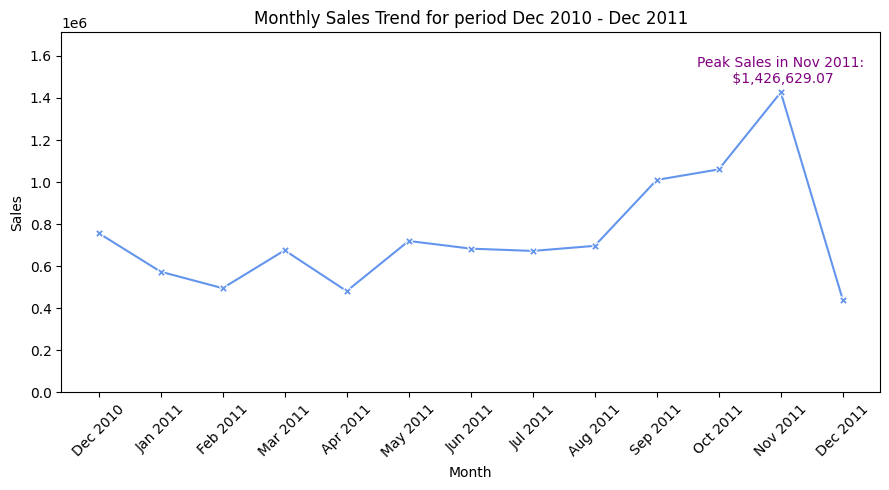

In [31]:
# Visualize the trend of sales by month
import calendar

sales_by_month = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
# convert the month into month name
sales_by_month['Month'] = sales_by_month['Month'].apply(lambda x: calendar.month_abbr[x])
sales_by_month['Period'] = sales_by_month['Month'] + ' ' + sales_by_month['Year'].astype(str)
print(sales_by_month)

# Plot a line chart to visualize the trend of sales
plt.figure(figsize=(9,5))
sns.lineplot(data=sales_by_month, x='Period', y='Sales', marker='X', color='cornflowerblue')
plt.title('Monthly Sales Trend for period Dec 2010 - Dec 2011')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.ylim(0, sales_by_month.Sales.max()*1.2)

# Annotate the month with highest sales
plt.annotate(f"Peak Sales in Nov 2011:\n ${sales_by_month.Sales.max():,.2f}",
             xy=('Nov 2011', sales_by_month.Sales.max()),
             xytext=('Nov 2011', sales_by_month.Sales.max() + 45000),
             color="purple",  ha="center")


plt.tight_layout()
plt.show()

In [32]:
print("Year 2010", df[(df.Year == 2010) & (df.Month == 12)].Day.unique())
print("Year 2011", df[(df.Year == 2011) & (df.Month == 12)].Day.unique())

Year 2010 [ 1  2  3  5  6  7  8  9 10 12 13 14 15 16 17 19 20 21 22 23]
Year 2011 [1 2 4 5 6 7 8 9]


**🔍Observations**

*   These is a notable increase in Sales starting from Sep 2011.
*   The highest sales occured in Nov 2011.
*   Although the graph suggests a significant drop in sales for Dec 2011, further investigation reveals that the dataset only includes orders up to 9th Dec 2011. On the other hand, Dec 2010 includes orders for the entire month. Therefore, the apparent drop is due to incomplete data for Dec 2011.



In [33]:
sales_by_order = df.groupby('InvoiceNo')['Sales'].sum()
num_cancelled_orders = sales_by_order[sales_by_order < 0].count()
print(f"""{num_cancelled_orders} out of {df.InvoiceNo.nunique()} orders in this dataset were cancellations.
After removing these and their associated original orders, approximately {df.InvoiceNo.nunique() - num_cancelled_orders*2} orders represent genuine purchases.""")

3696 out of 23563 orders in this dataset were cancellations.
After removing these and their associated original orders, approximately 16171 orders represent genuine purchases.


🔍Observations

A significant number of orders were placed and later cancelled.
To conduct a more accurate analysis of sales and purchasing behavior, it may be better to remove these cancelled orders.

Hour
6        1
7       29
8      565
9     1476
10    2347
11    2389
12    3211
13    2744
14    2440
15    2321
16    1325
17     664
18     192
19     146
20      18
Name: InvoiceNo, dtype: int64


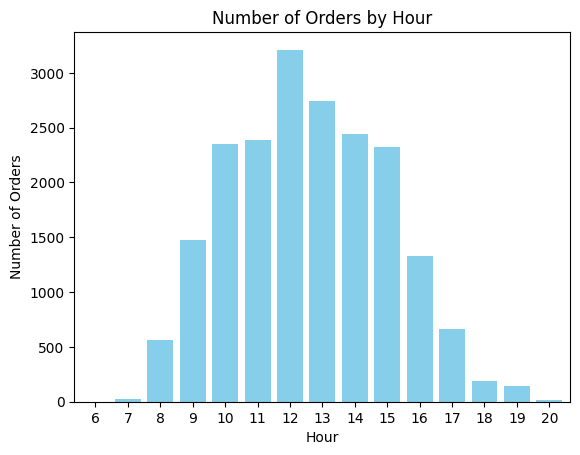

In [34]:
# # Extract the hour from the transaction time to analyze ordering patterns by time of day
df['Hour'] = df.Time.apply(lambda x: x.hour)

# Group by hour and count unique orders to identify peak ordering hours (excluding returns)
order_by_hour = df[df.Sales > 0].groupby('Hour')['InvoiceNo'].nunique().sort_index()
print(order_by_hour)

# Plot the distribution of order volume across different hours of the day
order_by_hour.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

**🔍Observations**
* Order placements are most active between 10 AM and 4 PM.
* The peak in order volume around 12 PM to 1 PM may be influenced by lunchtime activity.🍽️

                Sales  InvoiceNo  SalesContribution
CustomerID                                         
14646       278466.02         74               2.87
18102       256438.49         62               2.65
17450       188260.57         51               1.94
14911       128333.73        247               1.32
12415       123638.18         24               1.28
14156       112564.59         65               1.16
17511        88127.55         45               0.91
16684        65892.08         31               0.68
13694        62690.54         60               0.65
15311        59284.19        118               0.61


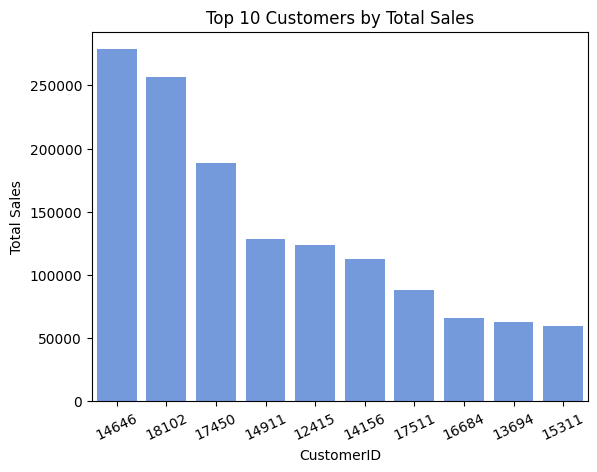

In [35]:
# Identify the top 10 customers who generated the highest sales for the company
df_knownCust = df[df.CustomerID != 'Unknown']
most_sales_cust = df_knownCust.groupby('CustomerID').agg({
    'Sales': 'sum',
    'InvoiceNo': 'nunique'
}).sort_values(by='Sales', ascending=False).head(10)
most_sales_cust['SalesContribution'] = round(most_sales_cust.Sales / total_sales * 100, 2)
print(most_sales_cust)

sns.barplot(x=most_sales_cust.index, y=most_sales_cust.Sales, color='cornflowerblue', order=most_sales_cust.index)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('CustomerID')
plt.ylabel('Total Sales')
plt.xticks(rotation=25)
plt.show()
# Customer with ID 14646 generated the most sales for the company, accounting for 2.87% of total sales during the period.

            InvoiceNo     Sales
CustomerID                     
14911              47 -11202.44
17841              45   -650.79
14606              35   -442.80
14527              31   -797.44
15311              27  -1348.56
16422              24   -878.71
13089              21  -1439.95
13408              19   -629.63
13534              18   -257.00
12471              18  -1065.13


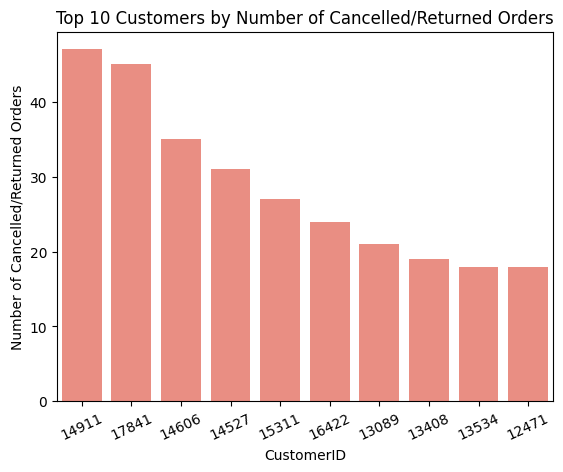

In [36]:
# Identify the top 10 customers with the highest number of cancelled or returned orders
most_returns_cust = df_knownCust[df_knownCust.Sales < 0].groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Sales': 'sum'
}).sort_values(by='InvoiceNo', ascending=False).head(10)
print(most_returns_cust)

sns.barplot(x=most_returns_cust.index, y=most_returns_cust.InvoiceNo, color='salmon', order=most_returns_cust.index)
plt.title('Top 10 Customers by Number of Cancelled/Returned Orders')
plt.xlabel('CustomerID')
plt.ylabel('Number of Cancelled/Returned Orders')
plt.xticks(rotation=25)
plt.show()
# Customers with IDs 14911 and 17841 have over 40 cancelled or returned orders within a one-year period.
# Despite this high number of returns, Customer ID 14911 is still the 4th highest contributor to the company's sales.

**🔍Observation**
* Customer ID 14646 generated the most sales for the company.
* Customers with IDs 14911 and 17841 have over 40 cancelled or returned orders within a one-year period.
* Despite this high number of returns, Customer ID 14911 is still the 4th highest contributor to the company's sales.

In [37]:
# Identify the number of customers who only made one purchase during the period
df_singleOrder = df_knownCust.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=True)
df_singleOrder = df_singleOrder[df_singleOrder == 1]
total_customers = df_knownCust.CustomerID.nunique()
print(f"There are {len(df_singleOrder)} customers who only made one purchase, out of {total_customers} total identifiable customers, representing {round( len(df_singleOrder) *100 / total_customers ,2)}%.")

There are 1323 customers who only made one purchase, out of 4371 total identifiable customers, representing 30.27%.


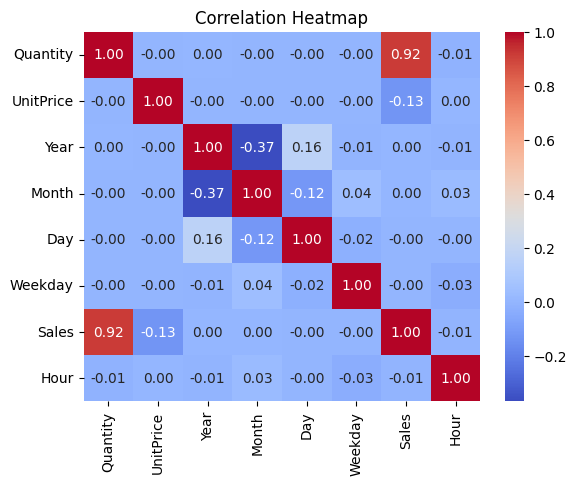

In [38]:
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# There is a strong positive correlation between Sales and Quantity, which is expected.
# There is also a weak negative correlation between Unit Price and Sales, suggesting that higher prices may lead to lower sales.
  # However, the relationship is not very strong.

## **Conclusion**
This analysis of the Online Retail dataset from 2010 to 2011 has yielded several key insights:

### Products
* `WORLD WAR 2 GLIDERS ASSTD DESIGNS` was the best-selling product, with 53,751 units sold.
* `REGENCY CAKESTAND 3 TIER` was the most profitable product, contributing 1.70% of the company's total sales during the period.

### Customers
* Customer ID 14646 generated the most revenue for the company.
* Customer IDs 14911 and 17841 each recorded over 40 cancelled or returned orders during the one-year period.
* 1323 customers, or 30.27% of the 4371 identifiable customers, made only a single purchase.

### Sales
*   Sales performance peaked in November 2011.
*   Order placements were highest during lunchtime hours (12 PM – 1 PM) and on Thursdays.

### Considerations
* The current dataset only includes transactions up to December 9, 2011, which means December sales are incomplete and cannot be fully compared to other months.
* A significant number of cancelled or returned orders are present. For more accurate insights into genuine purchasing behavior, it may be beneficial to exclude both the returns and their associated original orders from the analysis.

### 📜 Recommendations

* Focus on promoting high-sales items like `REGENCY CAKESTAND 3 TIER` to generate more sales.
* Ensure sufficient stock for best selling products like `WORLD WAR 2 GLIDERS ASSTD DESIGNS` to meet demand.
* Consider launching marketing campaigns during Q4 when customer activities increased.
* Schedule promotions during peak purchasing hours (10 AM to 4 PM) to maximize sales and engagement.
* Implement loyalty programs to encourage repeat purchases and increase customer retention.
* Investigate the reasons for cancelled/ returned orders to minimize order reversals.